In [1]:
import pandas as pd
import random
import string

# Generate random skills
skills = ['Python', 'Java', 'Machine Learning', 'Data Analysis', 'Web Development',
          'Marketing', 'Communication', 'Design', 'Cloud Computing', 'AI']

# Generate synthetic dataset
num_samples = 1000

data = []
for _ in range(num_samples):
    student_id = f'S{random.randint(1000, 9999)}'
    student_skills = random.sample(skills, k=random.randint(2, 5))

    stress_level = random.choice(['Low', 'Medium', 'High'])

    empathy_score = round(random.uniform(0.2, 1.0), 2)

    # Generate random messages
    message = f"I am looking for an internship in {random.choice(skills)}. Feeling {stress_level.lower()} stressed."

    internship_title = random.choice(['Software Engineer Intern', 'Marketing Associate', 'Data Scientist Intern',
                                      'Web Developer Intern', 'AI Research Intern'])

    company = random.choice(['Google', 'Microsoft', 'Amazon', 'Meta', 'Tesla', 'Netflix', 'IBM'])

    required_skills = random.sample(skills, k=random.randint(2, 4))

    recommendation_score = round(random.uniform(0.5, 1.0), 2)

    data.append([student_id, student_skills, stress_level, empathy_score, message,
                 internship_title, company, required_skills, recommendation_score])

# Create DataFrame
df = pd.DataFrame(data, columns=['Student_ID', 'Student_Skills', 'Stress_Level', 'Empathy_Score',
                                 'Student_Message', 'Internship_Title', 'Company',
                                 'Required_Skills', 'Recommendation_Score'])

# Save dataset
df.to_csv('internship_dataset.csv', index=False)
print("Dataset saved as internship_dataset.csv")

# Display first few rows
df.head()


Dataset saved as internship_dataset.csv


,Student_ID,Student_Skills,Stress_Level,Empathy_Score,Student_Message,Internship_Title,Company,Required_Skills,Recommendation_Score
0,S2239,"[AI, Marketing, Python]",High,0.75,I am looking for an internship in Web Developm...,AI Research Intern,Meta,"[Design, Java, Web Development]",0.50
1,S2083,"[Design, Marketing, Web Development]",Low,0.36,I am looking for an internship in Communicatio...,AI Research Intern,Meta,"[Machine Learning, Web Development, Python]",0.68
2,S1270,"[Design, Machine Learning, Python, Data Analys...",High,0.88,I am looking for an internship in Cloud Comput...,Web Developer Intern,IBM,"[Communication, Machine Learning, Cloud Comput...",0.75
3,S7600,"[Data Analysis, Cloud Computing]",Medium,0.68,I am looking for an internship in Java. Feelin...,Software Engineer Intern,Microsoft,"[Java, Web Development, Machine Learning, Comm...",0.73
4,S3871,"[Machine Learning, AI, Marketing, Web Developm...",High,0.94,I am looking for an internship in Cloud Comput...,AI Research Intern,Meta,"[AI, Machine Learning, Cloud Computing]",0.74


In [2]:
!pip install transformers gradio pandas torch scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from transformers import BertTokenizer, BertForSequenceClassification
# Import AdamW from torch.optim instead of transformers.optimization
from torch.optim import AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.functional import softmax

# ... (rest of your code remains the same) ...

# ... (rest of your code remains the same) ...

# Load dataset
df = pd.read_csv('internship_dataset.csv')

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize student messages
X = df['Student_Message'].tolist()
y = df['Stress_Level'].map({'Low': 0, 'Medium': 1, 'High': 2}).values

tokens = tokenizer(X, padding=True, truncation=True, max_length=128, return_tensors='pt')

# Train/test split
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(tokens['input_ids'], y, test_size=1-train_size, random_state=42)

# Create Datasets
train_dataset = TensorDataset(X_train, torch.tensor(y_train))
test_dataset = TensorDataset(X_test, torch.tensor(y_test))

# DataLoader
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model Initialization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
epochs = 4
for epoch in range(epochs):
    model.train()
    for batch in train_loader:
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = torch.nn.CrossEntropyLoss()(outputs.logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# Evaluation
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        predictions = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Epoch 1/4, Loss: 0.07410158962011337
Epoch 2/4, Loss: 0.01824071630835533
Epoch 3/4, Loss: 0.008967684581875801
Epoch 4/4, Loss: 0.006141196470707655
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [9]:
import gradio as gr

def internship_assistant(message):
    # Simulate message analysis
    stress = "High" if "stress" in message.lower() else "Low"
    recommendation = "Software Engineer Intern at Google"

    response = f"Stress Level: {stress}\nRecommended Internship: {recommendation}\n"

    if stress == "High":
        response += "\n✨ Motivational Message: Keep going! You've got this. ✨"

    return response

# Gradio Interface
iface = gr.Interface(
    fn=internship_assistant,
    inputs="text",
    outputs="text",
    title="🎓 Internship Placement Assistant",
    description="Enter a message to receive a stress analysis and internship recommendation."
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9e19f10e7c1fc98426.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


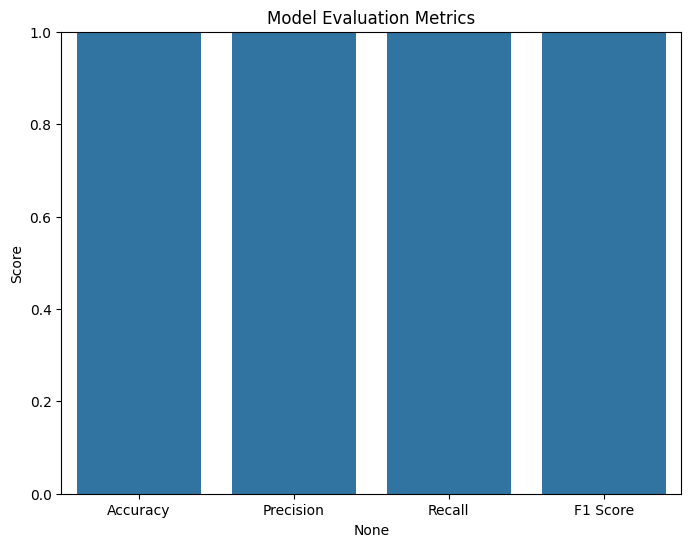

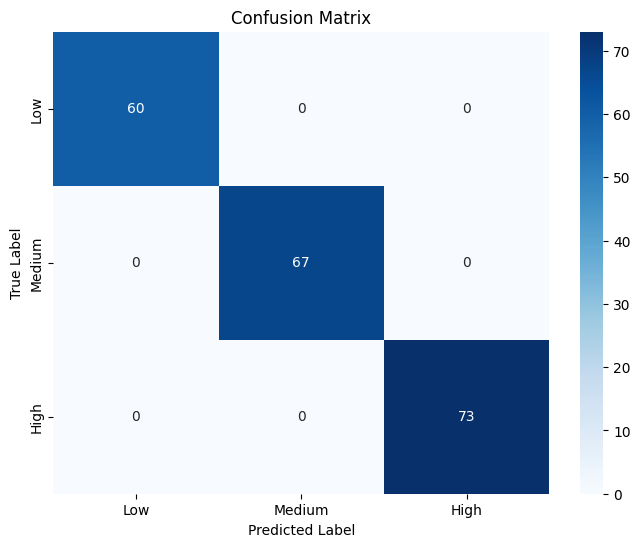

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code for data loading, model training, and evaluation) ...

# Visualization 1: Metrics Bar Plot
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Score'])

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics_df.index, y='Score', data=metrics_df)
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)  # Set y-axis limits for better visualization
plt.show()

# Visualization 2: Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [14]:
import gradio as gr
import random
import pandas as pd

# Sample internship categories
internships = {
    "Data Science": ["Data Scientist Intern at Google", "ML Engineer Intern at Microsoft", "Data Analyst Intern at Amazon"],
    "Backend Development": ["Backend Developer Intern at Uber", "Java Engineer Intern at Flipkart", "Microservices Developer Intern at Paytm"],
    "Full Stack Development": ["Full Stack Intern at Meta", "Frontend Intern at Zomato", "MERN Stack Intern at Swiggy"]
}

# Model Simulation Function
def recommend_internship(name, skills, education, experience, projects, certifications, preference):
    """Simulates model output for internship recommendation"""

    # Generate a random fit score
    fit_score = random.randint(70, 100)

    # Select random internships based on preference
    recommendations = random.sample(internships.get(preference, []), 3)

    # Generate Output
    result = {
        "Candidate": name,
        "Fit Score": f"{fit_score}%",
        "Recommended Internships": ", ".join(recommendations)
    }

    # Convert to DataFrame for better display
    df = pd.DataFrame([result])
    return df

# Gradio Interface
app = gr.Interface(
    fn=recommend_internship,
    inputs=[
        gr.Textbox(label="Name"),
        gr.Textbox(label="Skills (comma-separated)"),
        gr.Textbox(label="Education"),
        gr.Number(label="Years of Experience"),
        gr.Textbox(label="Projects (comma-separated)"),
        gr.Textbox(label="Certifications (comma-separated)"),
        gr.Dropdown(label="Internship Preference", choices=["Data Science", "Backend Development", "Full Stack Development"])
    ],
    outputs=gr.Dataframe(label="Internship Recommendations"),
    title="🎯 Internship Placement Assistant",
    description="Enter candidate details to receive internship fit scores and recommendations."
)

# Launch the Gradio app
app.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4e933f11cb176c11ed.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
